# Computer Vision --> 

| Topic | Contents |
|---|---|
| 0. Computer vision libraries in PyTorch | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out. |
| 1. Load data | To practice computer vision, we'll start with some images of different pieces of clothing from FashionMNIST. |
| 2. Prepare data | We've got some images, let's load them in with a PyTorch DataLoader so we can use them with our training loop. |
| 3. Model 0: Building a baseline model | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop. |
| 4. Making predictions and evaluting model 0 | Let's make some predictions with our baseline model and evaluate them. |
| 5. Setup device agnostic code for future models | It's best practice to write device-agnostic code, so let's set it up. |
| 6. Model 1: Adding non-linearity | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| 7. Model 2: Convolutional Neural Network (CNN) | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| 8. Comparing our models | We've built three different models, let's compare them. |
| 9. Evaluating our best model | Let's make some predictons on random images and evaluate our best model. |
| 10. Making a confusion matrix | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| 11. Saving and loading the best performing model | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

### Input and Output shapes -> 

Images -> Tensors 

These tensors have 2 types of shapes -> 
- Shape = [ Batch_Size , Height , Width, Colour Channels] -> NHWC
    - Ex -> Shape = [None , 28 , 28 , 1]
- Shape = [ Batch_Size , Colour Channels ,Height , Width] -> NCHW
    - Ex -> Shape = [ 32  , 1 , 28 , 28]


PyTorch expects Colour Channels first.

# Convulational Neural Networks -> 

The base libraries for Computer Vision problems -> 
- `TorchVision`
- `Torchvision.datasets` -> Has data + functions.
- `Torchvision.models` -> Has pretrained models.
- `Torchvision.transforms` -> Has functions for manipulating your image to be suitable with ML model. 
- `Torchvision.utils.data.Dataset` -> Base dataset for PyTorch. 
- `Torchvision.utils.data.Dataloader` -> Creates a python iterable over a dataset.


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

torch.__version__ , torchvision.__version__

('2.4.0+cu124', '0.19.0+cu124')

#### Getting a Dataset ->

- FashionMNIST

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None)

In [3]:

len(train_data) , len(test_data)

(60000, 10000)

In [4]:
#First training example -> 

imageToTensor, label = train_data[33] 
imageToTensor, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0039, 0.0000, 0.0314, 0.8824, 0.7686, 0.7843, 0.9490,
           0.5176, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0824, 0.8784, 0.8000, 0.8118, 0.6392,
           0.4510, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0549, 0.1216, 0.1569, 0.0000, 0.5255, 0.9961, 0.9804, 0.8471,
           0.0902, 0.0235, 0.1373, 0.0745, 0.0157, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.1490,
           0.1059, 0.1059, 0.0824, 0.0000, 0.2902, 0.7843, 0.6118, 0.6431,
           0.3176, 0.0392, 0.1059, 0.1176, 

In [5]:
classes = train_data.classes
classids=train_data.class_to_idx

print(train_data.classes)
print(train_data.class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [6]:
print(f"Shape = {imageToTensor.shape} = [Colour Channels, Height, Width]")

#1 Colour Channel, 28x28 H,W picture.

Shape = torch.Size([1, 28, 28]) = [Colour Channels, Height, Width]


### Plotting our data for visualisation -> 

In [7]:
image, label = train_data[2500]
print(image.shape)

torch.Size([1, 28, 28])


In [8]:
image = image.permute(1,2,0)  # This is needed as CC,H,W gives a shape issue.
image.shape

torch.Size([28, 28, 1])

Text(0.5, 1.0, 'Dress')

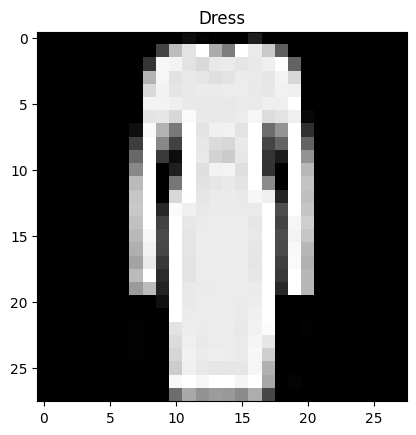

In [9]:
plt.imshow(image, cmap="gray")
plt.title(classes[label])

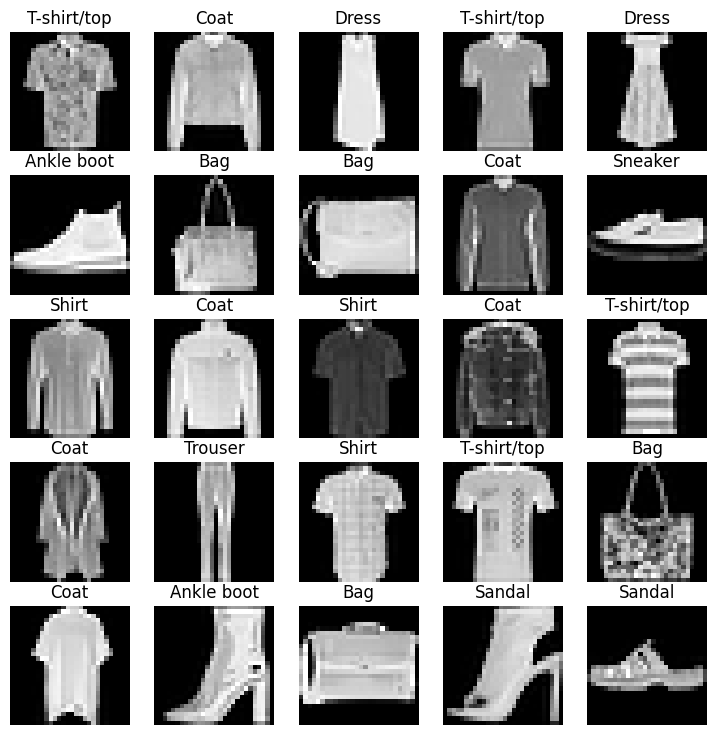

In [10]:
torch.manual_seed(33)
fig = plt.figure(figsize=(9,9))
rows,columns = 5,5

for i in range(1, rows*columns+1):
    random_idx = torch.randint(0,len(train_data)+1, size =[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img.permute(1,2,0), cmap = "gray")
    plt.title(classes[label])
    plt.axis(False)

#### Prepare a Dataloader -> 

A dataloader converts our data into a **Python iterable**

- Moreover, We do this to create **batches/mini-batches** out of our data. We do this because -> 
    - More computationally efficient, as in, computer hardware might not be able to look(store in memory) 60000 images in one hit, So we break it down into batches of 32.
    - Gives our Neural Network more chances to update its parameter gradients per epoch

In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE=32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,shuffle=0.3 )
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE )


In [12]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000015BEDC5F140>, <torch.utils.data.dataloader.DataLoader object at 0x0000015BEDC5DD00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
#Checking out whats inside the dataloader -> 

train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch = next(iter(test_dataloader))
train_features_batch.shape, train_labels_batch.shape, test_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 torch.Size([32, 1, 28, 28]),
 torch.Size([32]))

torch.Size([1, 28, 28])
tensor(7)


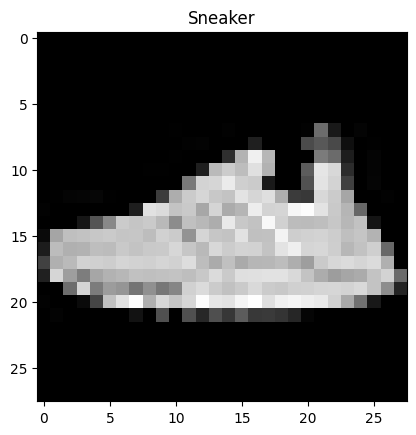

In [14]:
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(classes[label])
print(img.size())
print(label)

## Building the Model ->

First we will build a base model, Then we will improve through experimentation.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [16]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
    
    def __init__(self,
                 input_shape:int,
                 hidden_units:int, 
                 output_shape:int):
        super().__init__()
        
        self.layer_stack  = nn.Sequential(
            
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
            
        )
        
    def forward(self,x):
        return self.layer_stack(x)

In [17]:
model_1=FashionMNISTModelV1(input_shape=784,hidden_units=8,output_shape=len(classes)).to("cpu")

In [18]:
#Getting an idea how the result looks
dummy_x= torch.rand([1,1,28,28])
print(model_1(dummy_x))
print("\n")
print(model_1.state_dict())

tensor([[-0.0937,  0.0064,  0.2994, -0.1454, -0.1907, -0.2728,  0.1421, -0.0125,
          0.1929,  0.3708]], grad_fn=<AddmmBackward0>)


OrderedDict({'layer_stack.1.weight': tensor([[-0.0042, -0.0270, -0.0014,  ..., -0.0146, -0.0038,  0.0296],
        [-0.0009, -0.0100, -0.0245,  ..., -0.0100,  0.0129,  0.0138],
        [ 0.0333,  0.0327,  0.0254,  ...,  0.0032,  0.0176,  0.0133],
        ...,
        [-0.0283, -0.0134, -0.0307,  ...,  0.0287, -0.0190,  0.0111],
        [-0.0091,  0.0060, -0.0075,  ..., -0.0351,  0.0126, -0.0351],
        [-0.0256,  0.0234,  0.0286,  ..., -0.0329,  0.0002, -0.0313]]), 'layer_stack.1.bias': tensor([ 0.0077, -0.0168,  0.0250,  0.0091,  0.0055, -0.0219,  0.0357,  0.0341]), 'layer_stack.2.weight': tensor([[-0.1318, -0.1503, -0.2508,  0.3113, -0.3382,  0.3129,  0.2877, -0.1574],
        [ 0.1703,  0.1100,  0.1795,  0.3219, -0.2020,  0.2292,  0.0198,  0.1457],
        [-0.2661,  0.2335, -0.1219, -0.1736,  0.2082, -0.3071,  0.2983,  0.0194],
        [ 0.0947

### Training the model -> 

In [19]:
#Importing accuracy function and defining Loss & Optimizer functions
from helper_functions import accuracy_fn

loss_fn  = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.05)



Creating a function to time our experiments. 

As Machine Learning is very experimental. We usually only track -> 

-   Performance Metrics like Accuracy
-   How fast it runs 

In [20]:
#Creating a function to time our experiments -> 

from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
#Testing -> 
start_timer=timer()
a=1
for i in range(100000000): 
    a=a+1
end_timer=timer()

print_train_time(start=start_timer,end=end_timer,device="cpu")

Train time on cpu: 7.298 seconds


7.298200100000031

Side note -> As we create batches, The weights and biases are updated every batch rather than every epoch

## Creating a training and testing loop -> 
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate training loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the testing loss **per batch**
4. Print and Time it

In [22]:
#Importing progress bar -> 
from tqdm.auto import tqdm

torch.manual_seed(42)
#Starting the timer 
trainTimeStartOnCPU=timer()

#Setting up Epochs ( Small for faster training )    
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    
    #Training -> 
    training_loss = 0
    training_accuracy=0
    
    #Looping through the training batches -> 
    for batch,(X,y) in enumerate(train_dataloader):
        model_1.train()
        
        #Forward pass
        y_pred=model_1(X)
        
        #Loss per batch 
        loss = loss_fn(y_pred, y)
        training_loss = training_loss + loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step() # This optimizer step updates parameters at every batch, rather than every epoch.
        
    
        if batch%250==0 or batch==1875:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    

    training_loss /= len(train_dataloader)
    
    
    #Testing -> 
    testing_loss = testing_accuracy = 0
    model_1.eval()
    
    with torch.inference_mode():
        for X,y in test_dataloader:
            
            y_pred_test = model_1(X)
            
            test_loss=loss_fn(y_pred_test, y)
            testing_loss+=test_loss
            
            testing_acc=accuracy_fn(y_true=y,y_pred=y_pred_test.argmax(dim=1))
            testing_accuracy+=testing_acc
            
        
        testing_loss /= len(test_dataloader)
        testing_accuracy /= len(test_dataloader)
        
    print(f"\nTrain loss: {training_loss:.5f} | Test loss: {testing_loss:.5f}, Test acc: {testing_accuracy:.2f}%\n")
    
    

#End the timer -> 
trainTimeEndOnCPU = timer()
#Calculating the time -> 
totalTrainingTimeOnCPU_model1= print_train_time(start=trainTimeStartOnCPU,
                                                end=trainTimeEndOnCPU,
                                                device = str(next(model_1.parameters()).device))
            
 


c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 8000/60000 samples
Looked at 16000/60000 samples
Looked at 24000/60000 samples
Looked at 32000/60000 samples
Looked at 40000/60000 samples
Looked at 48000/60000 samples
Looked at 56000/60000 samples


 20%|██        | 1/5 [00:07<00:31,  7.93s/it]


Train loss: 0.62830 | Test loss: 0.50948, Test acc: 81.91%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 8000/60000 samples
Looked at 16000/60000 samples
Looked at 24000/60000 samples
Looked at 32000/60000 samples
Looked at 40000/60000 samples
Looked at 48000/60000 samples
Looked at 56000/60000 samples


 40%|████      | 2/5 [00:15<00:23,  7.99s/it]


Train loss: 0.48109 | Test loss: 0.48215, Test acc: 83.14%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 8000/60000 samples
Looked at 16000/60000 samples
Looked at 24000/60000 samples
Looked at 32000/60000 samples
Looked at 40000/60000 samples
Looked at 48000/60000 samples
Looked at 56000/60000 samples


 60%|██████    | 3/5 [00:24<00:16,  8.08s/it]


Train loss: 0.45578 | Test loss: 0.47482, Test acc: 83.30%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 8000/60000 samples
Looked at 16000/60000 samples
Looked at 24000/60000 samples
Looked at 32000/60000 samples
Looked at 40000/60000 samples
Looked at 48000/60000 samples
Looked at 56000/60000 samples


 80%|████████  | 4/5 [00:33<00:08,  8.42s/it]


Train loss: 0.44219 | Test loss: 0.46229, Test acc: 83.71%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 8000/60000 samples
Looked at 16000/60000 samples
Looked at 24000/60000 samples
Looked at 32000/60000 samples
Looked at 40000/60000 samples
Looked at 48000/60000 samples
Looked at 56000/60000 samples


100%|██████████| 5/5 [00:42<00:00,  8.49s/it]


Train loss: 0.43377 | Test loss: 0.46765, Test acc: 83.55%

Train time on cpu: 42.468 seconds


In [27]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
# Defining a evaluation model to be used again and again :)
def evaluate_model(model:torch.nn.Module,
                   data_loader:torch.utils.data.DataLoader,
                   loss_fn:torch.nn.Module,
                   accuracy_fn):
     
     #Returns a dictionary containing the results of model predicting on the dataloader.
    loss,acc=0,0
    
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            
            #Device agnostic -> 
            X=X.to(device)
            y=y.to(device)
            
            y_pred= model(X)
             
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
             

        loss/=len(data_loader)
        acc/=len(data_loader)
        
    return {"Model Name":model.__class__.__name__ ,
            "Model Loss":loss.item(),
            "Model Accuracy":acc}
    

In [26]:
model_1_results=evaluate_model(model=model_1, data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

print(model_1_results)

{'Model Name': 'FashionMNISTModelV1', 'Model Loss': 0.4676506221294403, 'Model Accuracy': 83.54632587859425}


### Setting up device agnostic code -> 

In [28]:
device = "cuda" if torch.cuda.is_available else "cpu"
torch.cuda.is_available() , device

(True, 'cuda')

In [29]:
# # Trying to implement on my own for practicing newer syntax
# import torch.nn as nn
# class PracticeModel(nn.Module):
    
#     def __init__(self,input_layers,hidden_layers,output_layers):
#         super().__init__()
        
#         self.layers=nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(in_features=input_layers,out_features=hidden_layers),
#             nn.Linear(in_features=hidden_layers,out_features=output_layers)
#         )
        
#     def forward(self,x):
#         return self.layers(x)
    
    
# # print(loss_fn , optimizer)
# torch.manual_seed(42)  # Ensures reproducibility
# mymodel=PracticeModel(input_layers=784,hidden_layers=8,output_layers=len(classes))
# # dummy_x=dummy_x.to(device)
# # testprediction=mymodel(dummy_x).squeeze()
# # torch.argmax(torch.softmax(testprediction,dim=0),dim=0)

# #Training and Testing loops -> 


# epochs = 5

# for epoch in range(epochs):
#     mymodel.train()
#     trainloss=0
#     for batch,(X,y) in enumerate(train_dataloader):
        
#         y_pred=mymodel(X)
        
#         lossperbatch=loss_fn(y_pred,y)
        
#         trainloss +=loss_fn(y_pred,y)
        
#         optimizer.zero_grad()
        
#         lossperbatch.backward()
      
#         optimizer.step()
        
#     trainloss/=len(train_dataloader)
    
    
#     #Testing -> 
#     testloss, testaccuracy=0,0
#     mymodel.eval()
    
#     with torch.inference_mode():
#         for X,y in test_dataloader:
#             test_pred = mymodel(X)
            
#             testloss+=loss_fn(test_pred,y)
#             # testaccuracy= testaccuracy+accuracy_fn(y_true=y,y_pred=test_pred)
            
#         testloss/=len(test_dataloader)
#         # testaccuracy/=len(test_dataloader)
        
#     print(f"\nEpoch{epoch} :Train loss: {trainloss} | Test loss: {testloss}")

## Building a better model with Non-Linearity

#### Defining & Initialising the Model, Loss Function and Optimizer ->  

In [30]:
class FashionMNISTModelV2(nn.Module):
    
    def __init__(self,input_features,output_features,hidden_features):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features,out_features=hidden_features),
            nn.ReLU(),
            nn.Linear(in_features=hidden_features,out_features=output_features),
            nn.ReLU()
        )
        
    def forward(self,x):
        return self.layers(x)

In [31]:
torch.manual_seed(42)

model_2=FashionMNISTModelV2(input_features=784,output_features=len(classes),hidden_features=8).to(device)

from helper_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_2.parameters(),lr=0.05)


#### Functionizing the Training and Testing part -> 

This function will 
- Carry out the training loop -> `train_step()` 
- Carry out the testing loop -> `test_step()` 

In [32]:
import torch.utils
import torch.utils.data


def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer=torch.optim.Optimizer, 
               accuracy_fn=accuracy_fn,
               device = device):
    
    model.train()
    training_loss=0
    training_accuracy=0
    
    for batch, (X,y) in enumerate(data_loader):
        
        X=X.to(device)
        y=y.to(device)
        
        y_pred = model(X)
        
        loss_per_batch=loss_fn(y_pred,y)
        training_loss+=loss_per_batch
        training_accuracy+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss_per_batch.backward()
        
        optimizer.step()
    
    training_loss/=len(data_loader)
    training_accuracy/=len(data_loader)
    
    print(f"Train loss: {training_loss:.5f} | Train accuracy: {training_accuracy:.2f}%")
        

In [33]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn=accuracy_fn,
              device=device):
    
    model.eval()
    
    testing_loss =0
    testing_accuracy=0
    with torch.inference_mode():
        for X,y in data_loader:
            X=X.to(device)                  #Missed device agnostic once
            y=y.to(device)
            y_pred_test = model(X)
            
            testing_loss+= loss_fn(y_pred_test,y)
            testing_accuracy+=accuracy_fn(y_true=y,y_pred=y_pred_test.argmax(dim=1)) #Missed argmax twice
            
            
        testing_loss/=len(data_loader)
        testing_accuracy/=len(data_loader)
    
        print(f"Test loss: {testing_loss:.5f} | Test accuracy: {testing_accuracy:.2f}%\n")

        

In [34]:
torch.manual_seed(42)

from timeit import default_timer as timer #For timing the operation

trainTimeStartonGPU=timer()

epochs=5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device="cuda")
    
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device="cuda")
    
    
trainTimeEndOnGPU=timer()

totalTrainingTimeOnGPU_model2=print_train_time(start=trainTimeStartonGPU,
                                               end=trainTimeEndOnGPU,
                                               device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.08888 | Train accuracy: 59.72%


 20%|██        | 1/5 [00:12<00:49, 12.48s/it]

Test loss: 0.78419 | Test accuracy: 71.27%

Epoch: 1
---------
Train loss: 0.74502 | Train accuracy: 72.44%


 40%|████      | 2/5 [00:24<00:36, 12.32s/it]

Test loss: 0.72406 | Test accuracy: 73.16%

Epoch: 2
---------
Train loss: 0.58810 | Train accuracy: 78.73%


 60%|██████    | 3/5 [00:37<00:24, 12.35s/it]

Test loss: 0.49213 | Test accuracy: 83.05%

Epoch: 3
---------
Train loss: 0.45946 | Train accuracy: 83.81%


 80%|████████  | 4/5 [00:50<00:12, 12.71s/it]

Test loss: 0.47315 | Test accuracy: 83.44%

Epoch: 4
---------
Train loss: 0.44507 | Train accuracy: 84.29%


100%|██████████| 5/5 [01:02<00:00, 12.55s/it]

Test loss: 0.47775 | Test accuracy: 83.16%

Train time on cuda: 62.775 seconds


In [35]:
print(model_1_results)

{'Model Name': 'FashionMNISTModelV1', 'Model Loss': 0.4676506221294403, 'Model Accuracy': 83.54632587859425}


In [36]:
model_2_results=evaluate_model(model_2,test_dataloader,loss_fn,accuracy_fn)
print(model_2_results)

{'Model Name': 'FashionMNISTModelV2', 'Model Loss': 0.47775229811668396, 'Model Accuracy': 83.15694888178913}


#### Note :
Sometimes the compute time on CPU is lesser than on the GPU. This might be because -> 
- Overhead for the copying data and model to and from the GPU outweights the benefits by GPU
- The hardware I am using might have a better processor than a graphics card. 

### Which model to use when?
| Problem type | Model to use (generally) | Code example |
|---|---|---|
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | sklearn.ensemble, XGBoost library |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | torchvision.models, HuggingFace Transformers |

In [37]:
#As Convolutional Neural Networks are great for images, We will try using them on the same dataset.

# Convolutional Neural Networks ➠

CNN's are known for their capabilities to find patterns in visual data.

It follows the typical structure of a convolutional neural network:

``Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer``

Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, depending on requirements.

Great Resource to visualise CNNs -> https://poloclub.github.io/cnn-explainer/

In [51]:
class FashionMNISTModelV3(nn.Module):
    
    #The model of this model replicated the TinyVGG model i.e. the cnn-explainer site model.
    def __init__(self, input_shape, hidden_features, output_shape):
        
        super().__init__()
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_features,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            
            nn.ReLU(),
            
            nn.Conv2d(in_channels=hidden_features,
                      out_channels=hidden_features,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2),
        )
        
        self.conv_block2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_features,
                      out_channels=hidden_features,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_features,
                      out_channels=hidden_features,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_features*7*7, #CATCH #Printing helps me see the dimensions after each layer and then when theres a mismatch, I can multiply by the output shown. 
                      out_features=output_shape)
        )
        
    def forward(self,x):
        x=self.conv_block1(x)
        # print(f"Output Shape of Convolutional Layer 1 : {x.shape}")
        x=self.conv_block2(x)
        # print(f"Output Shape of Convolutional Layer 2 : {x.shape}")
        
        x=self.classifier(x)
        # print(f"Output Shape of Classifier : {x.shape}") #As code worked , Commented it
        return x
    

In [52]:
model_3=FashionMNISTModelV3(input_shape=1,#Colour channels
                            hidden_features=10,
                            output_shape=len(classes)).to(device)

model_3

FashionMNISTModelV3(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### Demo of Conv2d :


In [53]:
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(images.shape)
print(test_image.shape)
print("\n\n",test_image)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])


 tensor([[[ 0.1383,  0.0133, -1.0475,  ..., -0.8457, -0.2726, -0.0781],
         [ 0.2015, -0.4259,  0.7799,  ..., -0.5742,  0.3782, -0.9894],
         [ 0.7475, -0.4456,  0.5627,  ...,  0.2013,  0.5507,  0.1468],
         ...,
         [-0.7038,  0.2693,  1.2440,  ...,  0.1860,  1.4566, -0.0110],
         [ 0.4225, -0.6023, -0.6141,  ...,  0.1513,  0.2996,  0.0297],
         [ 0.1640,  1.0325,  0.7277,  ...,  0.1152,  1.3865, -0.8805]],

        [[ 0.0945, -1.4011,  0.2511,  ...,  0.4727, -0.4521, -0.5019],
         [ 0.1904,  0.7242,  0.0431,  ...,  1.4368,  0.6337, -0.4147],
         [-1.3211, -0.0646, -0.7343,  ..., -1.6448, -0.9164,  2.4649],
         ...,
         [-0.4764, -1.1103,  0.0039,  ..., -0.2699, -0.4682, -1.0972],
         [ 0.9140,  1.7812,  0.1629,  ..., -0.7627, -0.7184, -0.8981],
         [ 1.0261, -1.8908,  0.9327,  ..., -2.5231, -0.6292, -1.1388]],

        [[-0.2642,  0.2280,  1.0826,  ..., -1.0939, -0.8124, 

In [54]:
#Setting up a conv layer -> 
conv_layer= nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1)
#Visualising conv layer ->
conv_output = conv_layer(test_image)
test_image.shape, conv_output.shape

(torch.Size([3, 64, 64]), torch.Size([10, 64, 64]))

In [55]:
#Setting up a MaxPool2d -> 

max_pool_layer = nn.MaxPool2d(kernel_size=2)


max_pooled_n_convulated_layer = max_pool_layer(conv_layer(test_image))

print(f"Test Image Shape: {test_image.shape}\nConvolution Output Shape: {conv_output.shape}\nMax Pooled and Convolved Layer Shape: {max_pooled_n_convulated_layer.shape}")

Test Image Shape: torch.Size([3, 64, 64])
Convolution Output Shape: torch.Size([10, 64, 64])
Max Pooled and Convolved Layer Shape: torch.Size([10, 32, 32])


In [56]:
#Visualising MaxPool2d -> 

dummy_tensor = torch.rand(size=(1,4,4))

dummy_tensor_maxpooled = max_pool_layer(dummy_tensor)

print(f"Dummy Tensor:\n{dummy_tensor}\nMax Pooled Tensor:\n{dummy_tensor_maxpooled}\n")
print(f"Dummy Tensor Shape: {dummy_tensor.shape}\nMax Pooled Tensor Shape: {dummy_tensor_maxpooled.shape}")


Dummy Tensor:
tensor([[[0.2748, 0.5785, 0.5553, 0.9103],
         [0.9028, 0.1397, 0.7109, 0.7017],
         [0.0376, 0.6684, 0.1409, 0.4029],
         [0.9922, 0.6195, 0.3023, 0.6832]]])
Max Pooled Tensor:
tensor([[[0.9028, 0.9103],
         [0.9922, 0.6832]]])

Dummy Tensor Shape: torch.Size([1, 4, 4])
Max Pooled Tensor Shape: torch.Size([1, 2, 2])


In [57]:
#Visualising our model -> 
random_image = torch.rand(size=(1,28,28)).to(device)
random_image.shape

random_image_output=model_3(random_image.unsqueeze(dim=0))

print(random_image_output,"\n")
print(torch.softmax(random_image_output,dim=1),"\n")
print(torch.argmax(torch.softmax(random_image_output,dim=1),dim=1))


tensor([[-0.0062, -0.0604,  0.0467, -0.0562,  0.0464, -0.0115, -0.0741,  0.0486,
         -0.0131, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>) 

tensor([[0.1003, 0.0950, 0.1057, 0.0954, 0.1057, 0.0997, 0.0937, 0.1059, 0.0996,
         0.0990]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 

tensor([7], device='cuda:0')


### Setting up a loss function and an optimizer -> 

In [58]:
from helper_functions import accuracy_fn
 
loss_fn=torch.nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(), lr =0.05)


## Training and Testing our model using functions :)

In [59]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

trainTimeStartonGPU=timer()
epochs=5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_3, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)
    test_step(model=model_3, data_loader=train_dataloader, loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
    
trainTimeEndOnGPU=timer()

totalTrainingTimeONGPU_model3=print_train_time(trainTimeStartonGPU,trainTimeEndOnGPU,device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.76671 | Train accuracy: 71.62%


 20%|██        | 1/5 [00:22<01:31, 22.98s/it]

Test loss: 0.38357 | Test accuracy: 86.24%

Epoch: 1
-------
Train loss: 0.37550 | Train accuracy: 86.49%


 40%|████      | 2/5 [00:46<01:09, 23.18s/it]

Test loss: 0.37303 | Test accuracy: 86.84%

Epoch: 2
-------
Train loss: 0.32631 | Train accuracy: 88.27%


 60%|██████    | 3/5 [01:09<00:46, 23.17s/it]

Test loss: 0.29807 | Test accuracy: 89.35%

Epoch: 3
-------
Train loss: 0.30110 | Train accuracy: 89.11%


 80%|████████  | 4/5 [01:32<00:23, 23.11s/it]

Test loss: 0.27441 | Test accuracy: 90.04%

Epoch: 4
-------
Train loss: 0.28523 | Train accuracy: 89.68%


100%|██████████| 5/5 [01:55<00:00, 23.08s/it]

Test loss: 0.28049 | Test accuracy: 89.58%

Train time on cuda: 115.387 seconds


In [60]:
model_3_results=evaluate_model(model_3,test_dataloader,loss_fn,accuracy_fn)
print(model_3_results)

{'Model Name': 'FashionMNISTModelV3', 'Model Loss': 0.3164442479610443, 'Model Accuracy': 88.59824281150159}


In [61]:
#Comparing all our models -> 
import pandas as pd
compare_results = pd.DataFrame([model_1_results,  #Only Linear 
                                model_2_results,  #Non Linear 
                                model_3_results   #CNN
                                ])
compare_results

compare_results["Training Time "] = [totalTrainingTimeOnCPU_model1,totalTrainingTimeOnGPU_model2,totalTrainingTimeONGPU_model3]
compare_results

,Model Name,Model Loss,Model Accuracy,Training Time
0,FashionMNISTModelV1,0.467651,83.546326,42.468016
1,FashionMNISTModelV2,0.477752,83.156949,62.774962
2,FashionMNISTModelV3,0.316444,88.598243,115.387376


Text(0, 0.5, 'Model')

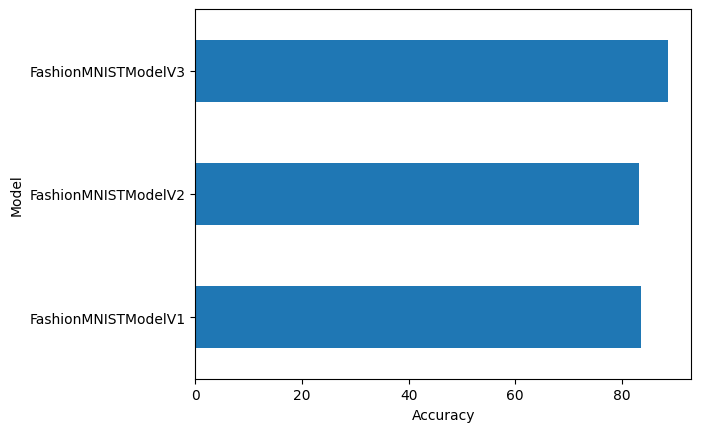

In [64]:
#Visualising the model results -> 

compare_results.set_index("Model Name")["Model Accuracy"].plot(kind="barh")
plt.xlabel("Accuracy")
plt.ylabel("Model") 

In [125]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device ):
    
    pred_probs=[]
    model.eval()
    model.to(device)
    
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim = 0).to(device)
            
            pred_logit = model(sample)
            
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
            
    return torch.stack(pred_probs)      

In [126]:
import random
# random.seed(42)
test_samples = []
test_labels  = []

for sample  , label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
    
print(test_samples[0].shape)

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Dress')

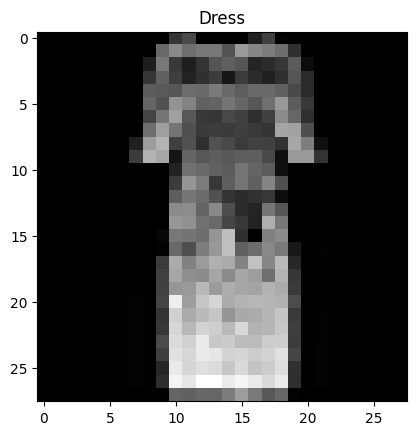

In [127]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(classes[test_labels[0]])

In [128]:
pred_probs = make_predictions(model=model_3,data=test_samples)

print(test_labels)

pred_classes = torch.argmax(pred_probs,dim=1)
print(pred_classes)

[3, 4, 7, 0, 9, 6, 4, 7, 2]
tensor([3, 4, 7, 0, 9, 6, 2, 7, 2])


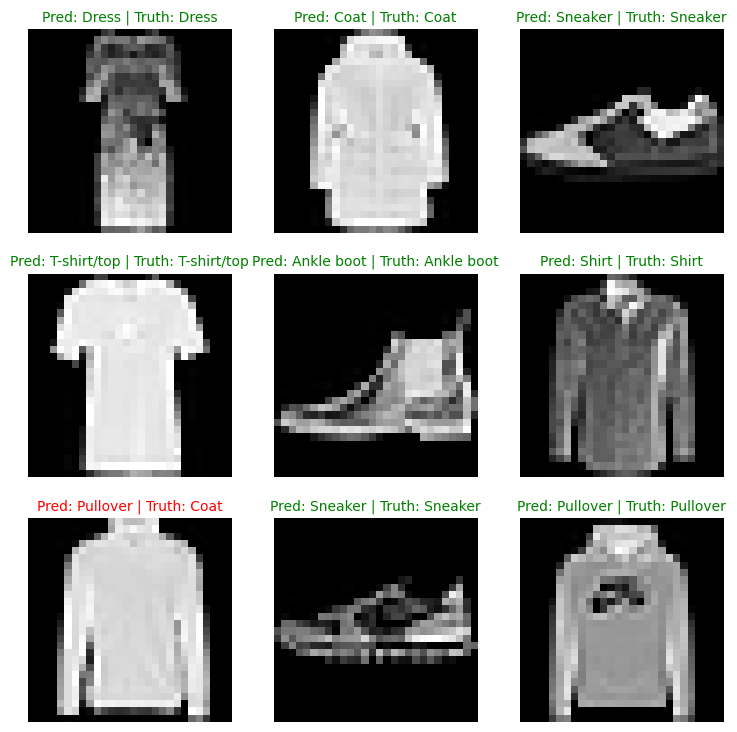

In [129]:
plt.figure(figsize=(9,9))
nrows,ncols=3,3
for i , sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    
    pred_label=classes[pred_classes[i]]
    truth_label = classes[test_labels[i]]
    
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False)

#### Plotting a confusion matrix for further evaluation of our product -> 
- We can use `torchmetrics.ConfusionMatrix()` for making the confusion matrix
- We can use `mlxtend.plotting.plot_confusion_matrix()` for plotting

In [130]:
import mlxtend
mlxtend.__version__

'0.23.1'

In [144]:
#Make predictions with the trained model  -> 

y_preds=[]
model_3.eval()

with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making Predictions..."):
        X,y=X.to(device),y.to(device)
        
        y_logit=model_3(X)
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        # print(y_label)
        
        #Putting predictions on CPU for plotting -> 
        y_preds.append(y_pred.cpu())
        
        
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions...: 100%|██████████| 313/313 [00:01<00:00, 212.37it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [145]:
len(y_pred_tensor)

10000

In [146]:
import torchmetrics
torchmetrics.__version__

'1.4.1'

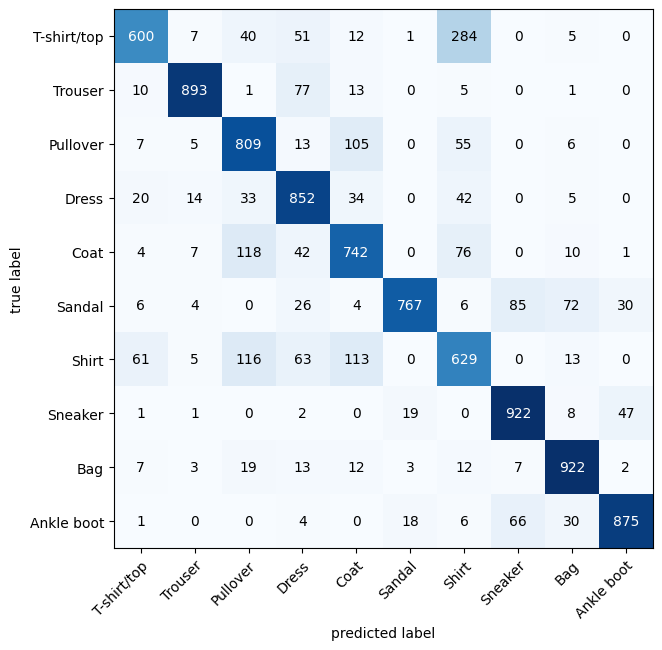

In [151]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#Set up confusion matrix instance => 
confmat = ConfusionMatrix(num_classes=len(classes),task="multiclass")

confmat_tensor = confmat(preds=y_pred_tensor, target= test_data.targets)
# confmat_tensor

#Plotting the confusion matrix ->   
fig,ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), figsize=(10,7), class_names=classes )

In [156]:
#Saving and Loading our Best Performing model. 

from pathlib import Path

# Create models directory (if it doesn't already exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "CNN_Model3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\CNN_Model3.pth


In [157]:
#Making a new instance and loading the state_dict() -> 

torch.manual_seed(42)

loaded_model_3 = FashionMNISTModelV3(input_shape = 1 , hidden_features=10, output_shape=len(classes))

loaded_model_3.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_3.to(device)

C:\Users\gaura\AppData\Local\Temp\ipykernel_23880\4271549549.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_3.load_state_dict(torch.load(MODEL_SAVE_PATH))


FashionMNISTModelV3(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [160]:
print(model_3_results)


{'Model Name': 'FashionMNISTModelV3', 'Model Loss': 0.3164442479610443, 'Model Accuracy': 88.59824281150159}


In [159]:
#Evalutating the loaded model -> 
torch.manual_seed(42)

loaded_model_3_results = evaluate_model(loaded_model_3,test_dataloader, loss_fn, accuracy_fn)
print(loaded_model_3_results)

{'Model Name': 'FashionMNISTModelV3', 'Model Loss': 0.3164442479610443, 'Model Accuracy': 88.59824281150159}


In [161]:
#Checking if the model results are closer to each other -> 

torch.isclose(torch.tensor(model_3_results["Model Loss"]), torch.tensor(loaded_model_3_results["Model Loss"]))

tensor(True)